In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv('Hotel_Reservations.csv')
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [3]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

By looking at the profiling report, there are no null values at any fields. Also we can see how many distinct values field by field.

In [4]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

Lets check how many of people canceled their booking.

In [5]:
data["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

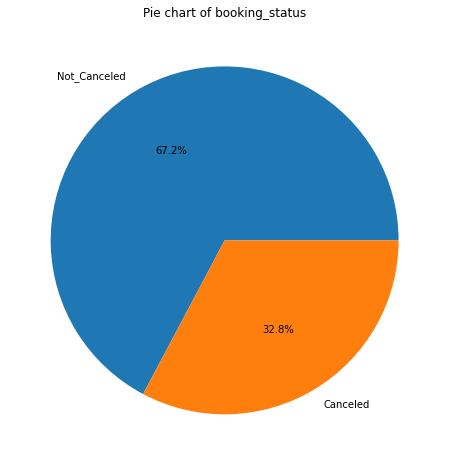

In [6]:
# plot pie chart for booking_status
plt.figure(figsize=(12, 8))
plt.pie(data["booking_status"].value_counts(), labels=data["booking_status"].value_counts().index, autopct='%1.1f%%')
plt.title('Pie chart of booking_status')
plt.show()

cancelation rate is very high with %32.8. I want to analyze  status by price per room. Below, there is the barchart.

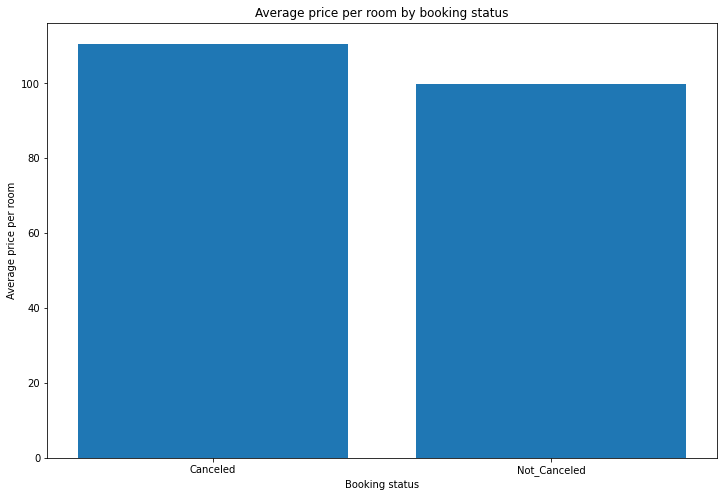

In [7]:
plt.figure(figsize=(12, 8))
plot_data = data.groupby('booking_status')['avg_price_per_room'].mean().reset_index()
plt.bar(plot_data['booking_status'], plot_data['avg_price_per_room'])
plt.title('Average price per room by booking status')
plt.xlabel('Booking status')
plt.ylabel('Average price per room')
plt.show()

Now, lets look room_type_reserved by booking status.

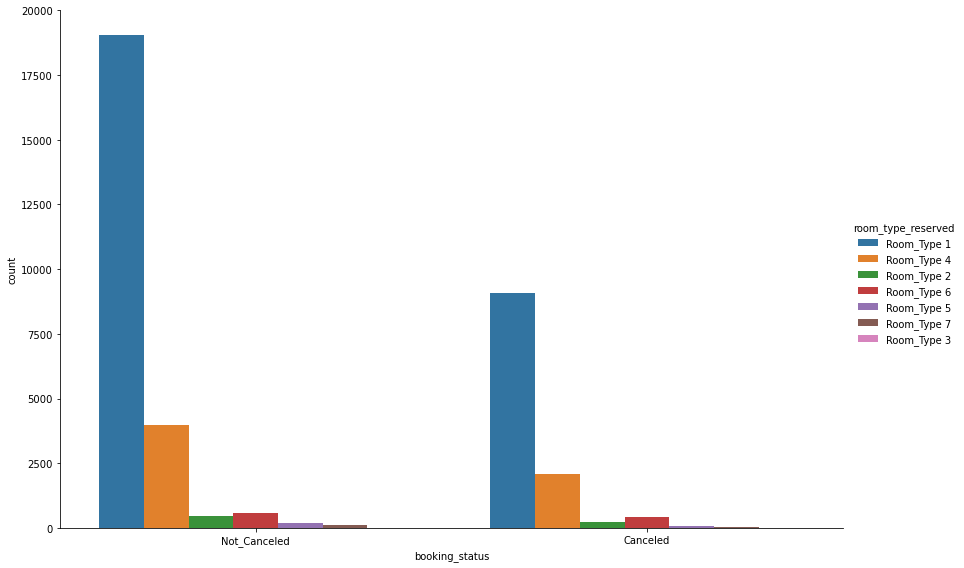

In [8]:
import seaborn as sns
sns.catplot(data, x='booking_status', hue='room_type_reserved', kind='count', height=8, aspect=1.5)

Finally, lets look type_of_meal_plan by booking status.

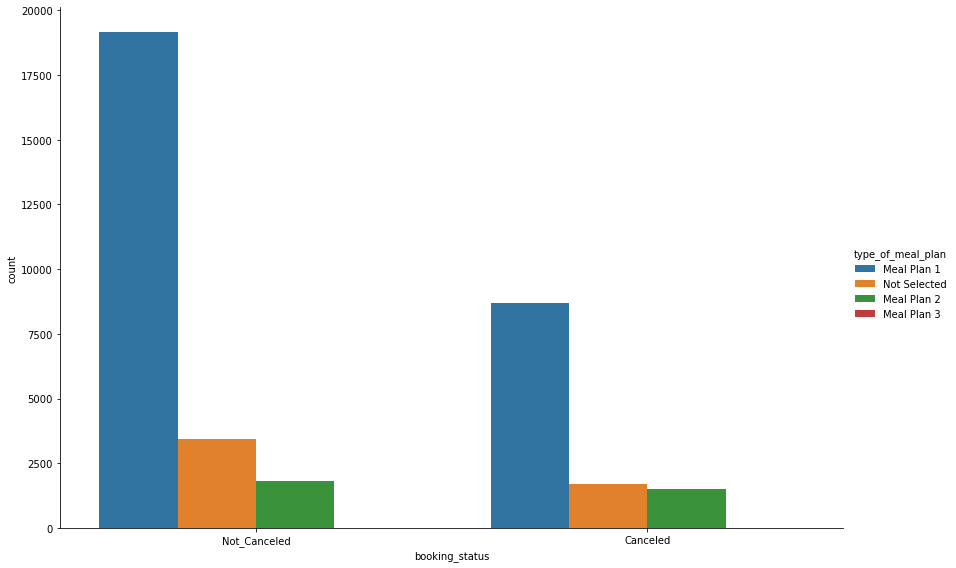

In [9]:
sns.catplot(data, x='booking_status', hue='type_of_meal_plan', kind='count', height=8, aspect=1.5)

Delete unnececarry features by looking at the heatmap above in Profile Report. (take 0.05 or above)

In [10]:
# delete unnecessary columns.
data_new = data.drop(["Booking_ID", "arrival_year", "no_of_previous_cancellations", "lead_time", "room_type_reserved"], axis=1)

In [11]:
data_new.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space  arrival_month  arrival_date  \
0       Meal Plan 1                           0             10             2   
1      Not Selected                           0             11             6   
2       Meal Plan 1                           0              2            28   
3       Meal Plan 1                           0              5            20   
4      Not Selected                           0              4            11   

  market_segment_type  repeated_guest  no_of_previous_bookings_not_canceled  \
0             Offline               0                                     0   
1              Online               0                                     0   
2              Online               0                                     0   
3              Online               0                                     0   
4              Online               0                                     0   

   avg_price_per_room  no_of_special_requests booking_status  
0               65.00                       0   Not_Canceled  
1              106.68                       1   Not_Canceled  
2               60.00                       0       Canceled  
3              100.00                       0       Canceled  
4               94.50                       0       Canceled

Convert categorical to numeric. (type_of_meal_plan and market_segment_type)

In [12]:
# convert categorical data to numerical data for market_segment_type column
data_new['market_segment_type'] = data_new['market_segment_type'].map({'Offline': 0, 'Online': 1, 'Corporate': 2, 'Complementary': 3, 'Aviation': 4})
data_new.head()


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space  arrival_month  arrival_date  \
0       Meal Plan 1                           0             10             2   
1      Not Selected                           0             11             6   
2       Meal Plan 1                           0              2            28   
3       Meal Plan 1                           0              5            20   
4      Not Selected                           0              4            11   

   market_segment_type  repeated_guest  no_of_previous_bookings_not_canceled  \
0                    0               0                                     0   
1                    1               0                                     0   
2                    1               0                                     0   
3                    1               0                                     0   
4                    1               0                                     0   

   avg_price_per_room  no_of_special_requests booking_status  
0               65.00                       0   Not_Canceled  
1              106.68                       1   Not_Canceled  
2               60.00                       0       Canceled  
3              100.00                       0       Canceled  
4               94.50                       0       Canceled

In [13]:
# convert categorical data to numerical data for type_of_meal_plan column
data_new['type_of_meal_plan'] = data_new['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})
data_new.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   type_of_meal_plan  required_car_parking_space  arrival_month  arrival_date  \
0                  1                           0             10             2   
1                  0                           0             11             6   
2                  1                           0              2            28   
3                  1                           0              5            20   
4                  0                           0              4            11   

   market_segment_type  repeated_guest  no_of_previous_bookings_not_canceled  \
0                    0               0                                     0   
1                    1               0                                     0   
2                    1               0                                     0   
3                    1               0                                     0   
4                    1               0                                     0   

   avg_price_per_room  no_of_special_requests booking_status  
0               65.00                       0   Not_Canceled  
1              106.68                       1   Not_Canceled  
2               60.00                       0       Canceled  
3              100.00                       0       Canceled  
4               94.50                       0       Canceled

Now, we can evaluate the accuricy for the data. (HOLDOUT TECHNIQUE)

In [14]:
from sklearn.model_selection import train_test_split

# split the data into train and test
X = data_new.drop(["booking_status"], axis=1)
y = data_new["booking_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

DecisionTree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create the model
model = DecisionTreeClassifier()

# train the model
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy_score(y_test, y_pred) * 100

80.82330239823578

RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# create the model
model = RandomForestClassifier()

# train the model
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy_score(y_test, y_pred) * 100

84.91224846090233

XGBoost

In [17]:
from xgboost import XGBClassifier
#close feature warnings
import warnings
warnings.filterwarnings('ignore')

# create the model
model = XGBClassifier()

# train the model
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy_score(y_test, y_pred) * 100

c:\Users\canba\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[13:41:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


83.95662960580722

CROSS-VALIDATION TECHNIQUE

DecisionTree

In [18]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()

# 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)

# print the avg scores
print(scores.mean())


0.8147484493452792


RandomForest

In [19]:
model = RandomForestClassifier()

# 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)

# print the avg scores
print(scores.mean())

0.8521019986216404


XGBoost

In [20]:
model = XGBClassifier()

# 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)

# print the avg scores
print(scores.mean())

[13:41:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:41:53] WARNING:

CONCLUSION :

RandomForest gives the highest accuracy. And we should use holdout technique. Eventhough, the best accuricy result is Cross Validation Technique with RandomForest, It takes too long compare to holdout technique. (9 seconds)